# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [3]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [4]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [5]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

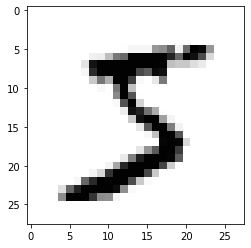

In [6]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

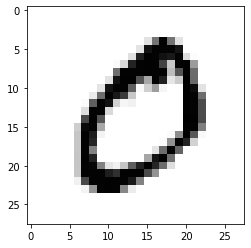

In [7]:
plt.imshow(x_train[1].reshape(28,28)).set_cmap('Greys')

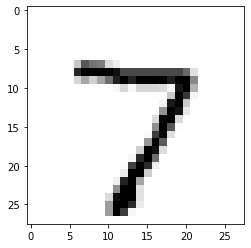

In [8]:
plt.imshow(x_test[0].reshape(28,28)).set_cmap('Greys')

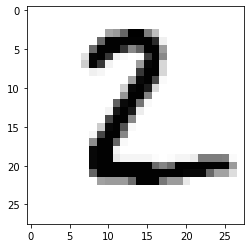

In [9]:
plt.imshow(x_test[1].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

In [12]:
# show MNIST label for above data
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [14]:
y_train

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [15]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [16]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
keras.layers.Flatten(input_shape=(28, 28))

In [18]:
inputs = keras.Input(shape=(784,), name = 'input_mnist')
x = keras.layers.Dense(30,activation='relu')(inputs)
outputs = keras.layers.Dense(10,activation='softmax', name = 'output_mnist')(x) 
model = keras.Model(inputs = inputs, outputs = outputs)

In [19]:
model.compile(loss = "binary_crossentropy", 
              optimizer = "adam",
              metrics = ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_mnist (InputLayer)    [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 30)                23550     
                                                                 
 output_mnist (Dense)        (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [21]:
print(model.layers[1].get_weights())
print(model.layers[2].get_weights())

[array([[-0.00169963,  0.01505357, -0.06717697, ..., -0.08195444,
        -0.04179713, -0.06040139],
       [-0.06666343, -0.00227627, -0.05453984, ...,  0.07744383,
         0.0496795 , -0.02839998],
       [ 0.08163238, -0.06432872, -0.01429103, ..., -0.03375905,
        -0.07185877,  0.04068964],
       ...,
       [-0.06229716,  0.02853395,  0.07820176, ...,  0.02032252,
        -0.0273377 ,  0.03885284],
       [-0.03237541,  0.00997374, -0.03493557, ...,  0.08125568,
         0.01333675, -0.07261258],
       [-0.03068016, -0.06737587, -0.02298246, ..., -0.06615106,
        -0.0569649 , -0.00687385]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]
[array([[-0.16455607, -0.16412328,  0.2367748 , -0.06624472, -0.12540317,
        -0.31528157,  0.3120982 , -0.08317205, -0.25027704,  0.21515775],
       [-0.15443164,  0.15918213,  0.2260806 , -0.25566182, -0.13173977

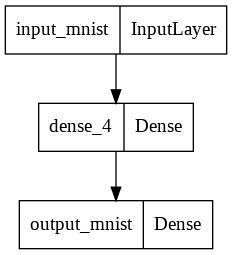

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model)

model을 자유롭게 train 해봅시다.  

In [23]:
model.fit(x_train,y_train,epochs=100, batch_size = 32)

Epoch 1/100
1875/1875 [==============================] - 8s 2ms/step - loss: 0.0861 - accuracy: 0.8752
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - accuracy: 0.9412
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9531
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - accuracy: 0.9603
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0264 - accuracy: 0.9649
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9679
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0225 - accuracy: 0.9704
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0215 - accuracy: 0.9718
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0203 - accuracy: 0.9741
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

95%이상의 성능을 가진 모델을 만들면 완성!

In [24]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0518 - accuracy: 0.9638 - 698ms/epoch - 2ms/step

Accuracy: 0.9638000130653381


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)